In [1]:
import numpy as np
import os
import glob
import json
import pickle
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

dataset = 'pascal_5000'
root_dir = '/home/kshitid20/Documents/Gemma Roig lab Dropbox/Kshitij/Multitask/CVPR_transferlearning/CVPR2020_results/small_model_pascal'
plt.rcParams.update({'font.size': 14})
feat_ablation_type = ['znorm']
operation_type = ['debiased_centered']
methods = ['lap_cka','cosine_cka','euclidean_cka']
corr_with_iterations = {}
for method in methods:
    corr_with_iterations[method]=[]
model_numbers = np.arange(20000, 220000, 20000)
for model_number in model_numbers:
    for operation in operation_type:
        for ablation in feat_ablation_type:
            data_path = os.path.join(root_dir,dataset,str(model_number),operation,ablation,'small_timing_boxplot_data.pkl')
            with open(data_path, 'rb') as f:
                data = pickle.load(f)
            df = pd.DataFrame (data, columns = ['correlation', 'distances'])
            #print(df)
            print(operation + "__" + ablation)
            print("------------------------------------------------------------------")
            for method in methods:
                print(method,\
              round(df['correlation'][df['distances']==method].mean(),3),\
              round(np.std(df['correlation'][df['distances']==method]),3))
                corr_with_iterations[method].append(round(df['correlation'][df['distances']==method].mean(),3))
            print("------------------------------------------------------------------")
        #plt.figure()
        #ax = sns.violinplot( x=df["distances"], y=df["correlation"])
        #plt.ylim([-0.6,1.0])
        #plt.xticks(rotation=90)
        #plt.title(operation + "__" + ablation)


debiased_centered__znorm
------------------------------------------------------------------
lap_cka -0.071 0.0
cosine_cka 0.006 0.0
euclidean_cka -0.06 0.0
------------------------------------------------------------------
debiased_centered__znorm
------------------------------------------------------------------
lap_cka 0.358 0.0
cosine_cka 0.42 0.0
euclidean_cka 0.34 0.0
------------------------------------------------------------------
debiased_centered__znorm
------------------------------------------------------------------
lap_cka 0.674 0.0
cosine_cka 0.702 0.0
euclidean_cka 0.664 0.0
------------------------------------------------------------------
debiased_centered__znorm
------------------------------------------------------------------
lap_cka 0.663 0.0
cosine_cka 0.672 0.0
euclidean_cka 0.632 0.0
------------------------------------------------------------------
debiased_centered__znorm
------------------------------------------------------------------
lap_cka 0.754 0.0
cos

In [2]:
#big model
feat_ablation_type = ['None','centering','znorm']
operation_type = ['default','debiased_centered']
methods = ['lap_cka','cosine_cka','euclidean_cka','pearson_rsa']
for operation in operation_type:
    for ablation in feat_ablation_type:
        data_path = os.path.join(root_dir,dataset,'big_model',operation,ablation,'small_timing_boxplot_data.pkl')
        with open(data_path, 'rb') as f:
            data = pickle.load(f)
        df = pd.DataFrame (data, columns = ['correlation', 'distances'])
        #print(df)
        print(operation + "__" + ablation)
        print("------------------------------------------------------------------")
        for method in methods:
            print(method,\
          round(df['correlation'][df['distances']==method].mean(),3),\
          round(np.std(df['correlation'][df['distances']==method]),3))
        print("------------------------------------------------------------------")

default__None
------------------------------------------------------------------
lap_cka 0.474 0.0
cosine_cka 0.45 0.0
euclidean_cka 0.317 0.0
pearson_rsa 0.397 0.0
------------------------------------------------------------------
default__centering
------------------------------------------------------------------
lap_cka 0.474 0.0
cosine_cka 0.477 0.0
euclidean_cka 0.317 0.0
pearson_rsa 0.691 0.0
------------------------------------------------------------------
default__znorm
------------------------------------------------------------------
lap_cka 0.669 0.0
cosine_cka 0.728 0.0
euclidean_cka 0.531 0.0
pearson_rsa 0.804 0.0
------------------------------------------------------------------
debiased_centered__None
------------------------------------------------------------------
lap_cka 0.803 0.0
cosine_cka 0.681 0.0
euclidean_cka 0.551 0.0
pearson_rsa 0.732 0.0
------------------------------------------------------------------
debiased_centered__centering
------------------------

In [6]:
rsa_pearson_old = [0.691] * 10
lap_cka_big = [0.837] * 10
cosine_cka_big = [0.819] * 10
euclidean_cka_big = [0.834] * 10

3


/home/kshitid20/anaconda3/envs/virtual-home/lib/python3.6/site-packages/matplotlib/legend.py:497: UserWarning: Unrecognized location "bottom right". Falling back on "best"; valid locations are
	best
	upper right
	upper left
	lower left
	lower right
	right
	center left
	center right
	lower center
	upper center
	center

  % (loc, '\n\t'.join(self.codes)))
/home/kshitid20/anaconda3/envs/virtual-home/lib/python3.6/site-packages/matplotlib/axes/_base.py:3610: MatplotlibDeprecationWarning: 
The `ymax` argument was deprecated in Matplotlib 3.0 and will be removed in 3.2. Use `top` instead.
  alternative='`top`', obj_type='argument')


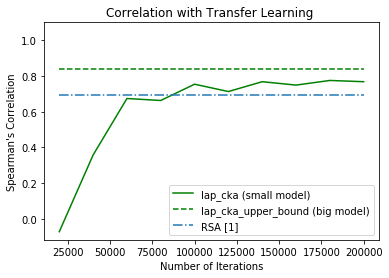

In [7]:
print(len(corr_with_iterations))
methods = ['lap_cka','cosine_cka','euclidean_cka']
linetypes = ['g-',':','--']
for i,method in enumerate(methods):
    plt.plot(model_numbers,corr_with_iterations[method],linetypes[i],label=method + ' (small model)')
    break
#plt.plot(model_numbers,euclidean_cka_big,linestyle='-',label='euclidean_cka_big')
#plt.plot(model_numbers,cosine_cka_big,linestyle=':',label='cosine_cka_big')
plt.plot(model_numbers,lap_cka_big,'g--',label='lap_cka_upper_bound (big model)')
plt.plot(model_numbers,rsa_pearson_old,linestyle='-.',label='RSA [1]')
plt.legend(loc='upper left')
plt.ylabel("Spearman's Correlation")
plt.xlabel('Number of Iterations')
plt.title("Correlation with Transfer Learning " )
plt.legend(loc="bottom right",prop={'size': 10})
plt.ylim(ymax=1.1)
plots_save_dir = "./corr_vs_iterations/"
if not os.path.exists(plots_save_dir):
    os.makedirs(plots_save_dir)
plots_save_path = os.path.join(plots_save_dir,"cka.eps")
plt.savefig(plots_save_path, bbox_inches="tight")

In [29]:
dist_type = ['pearson', 'euclidean', 'cosine','lap','rbf','linear']
similarity_type = ['spearman','cka', 'pearson']
ablation_type = ['default','centered','debiased_centered']
measures = []
for dist in dist_type:
    for similarity in similarity_type:
        for ablation in (ablation_type):
            if ablation=='default':
                debiased = False
                centered = False
            elif ablation=='centered':
                debiased = False
                centered = True
            elif ablation=='debiased_centered':
                debiased = True
                centered = True
            method_name = dist+"_"+similarity + "_" +ablation
            measures.append(method_name)
for measure in measures:
    print(measure,\
          round(df['correlation'][df['distances']==measure].mean(),3),\
          round(np.std(df['correlation'][df['distances']==measure]),3))

pearson_spearman_default 0.842 0.019
pearson_spearman_centered 0.828 0.023
pearson_spearman_debiased_centered 0.828 0.023
pearson_cka_default 0.497 0.002
pearson_cka_centered 0.835 0.013
pearson_cka_debiased_centered 0.851 0.019
pearson_pearson_default nan nan
pearson_pearson_centered nan nan
pearson_pearson_debiased_centered nan nan
euclidean_spearman_default 0.487 0.241
euclidean_spearman_centered 0.83 0.023
euclidean_spearman_debiased_centered 0.83 0.024
euclidean_cka_default 0.567 0.041
euclidean_cka_centered 0.696 0.038
euclidean_cka_debiased_centered 0.822 0.03
euclidean_pearson_default nan nan
euclidean_pearson_centered nan nan
euclidean_pearson_debiased_centered nan nan
cosine_spearman_default 0.845 0.019
cosine_spearman_centered 0.831 0.023
cosine_spearman_debiased_centered 0.831 0.023
cosine_cka_default 0.497 0.002
cosine_cka_centered 0.848 0.014
cosine_cka_debiased_centered 0.856 0.019
cosine_pearson_default nan nan
cosine_pearson_centered nan nan
cosine_pearson_debiased_cen